In [66]:
import os
import random
%load_ext autotime

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [2, 2]
matplotlib.rcParams['figure.dpi'] = 200

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision

from data_helper_triangle import TriangleLabeledDataset,image_names
from helper import collate_fn, draw_box

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

random.seed(0)
np.random.seed(0)
torch.manual_seed(0);

%load_ext autoreload
%autoreload 2

# All the images are saved in image_folder
# All the labels are saved in the annotation_csv file
image_folder = 'data'
annotation_csv = 'data/annotation.csv'

labeled_scene_index = np.arange(106, 134)
image_names

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


['CAM_FRONT.jpeg',
 'CAM_FRONT_LEFT.jpeg',
 'CAM_BACK_LEFT.jpeg',
 'CAM_BACK.jpeg',
 'CAM_BACK_RIGHT.jpeg',
 'CAM_FRONT_RIGHT.jpeg']

time: 23 ms


In [69]:
normalize = torchvision.transforms.Normalize(mean=[0.6394939, 0.6755114, 0.7049375],
                                     std=[0.31936955, 0.3117349 , 0.2953726 ])

transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                                           normalize
                                           ])
# The labeled dataset can only be retrieved by sample.
# And all the returned data are tuple of tensors, since bounding boxes may have different size
# You can choose whether the loader returns the extra_info. It is optional. You don't have to use it.
labeled_trainset = TriangleLabeledDataset(image_folder=image_folder,
                                  annotation_file=annotation_csv,
                                  scene_index=labeled_scene_index,
                                  transform=transform,
                                  extra_info=True,
                                camera = 'CAM_FRONT.jpeg'
                                 )

time: 117 ms


In [104]:
trainloader = torch.utils.data.DataLoader(labeled_trainset , batch_size=2, shuffle=True, num_workers=2, collate_fn=collate_fn)

time: 1.15 ms


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


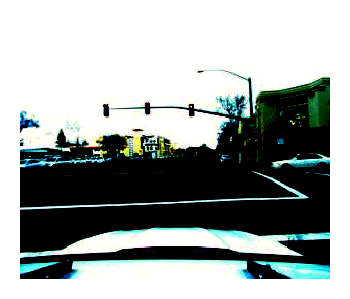

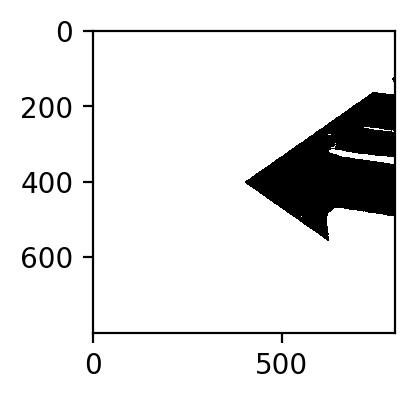

time: 520 ms


In [106]:
sample, target, road_image, extra = iter(trainloader).next()
plt.imshow(sample[0].numpy().transpose(1, 2, 0))
plt.axis('off');
fig, ax = plt.subplots()

ax.imshow(road_image[0], cmap='binary');

In [120]:
training_tools = {camera: (nn.Linear(512,800*800), TriangleLabeledDataset(image_folder=image_folder,
                                  annotation_file=annotation_csv,
                                  scene_index=labeled_scene_index,
                                  transform=transform,
                                  extra_info=True,
                                camera = camera)) for camera in image_names}
    
model = torchvision.models.resnet18()


time: 9.67 s


Linear(in_features=512, out_features=640000, bias=True)

time: 1.42 s


In [105]:
sample[0].shape

torch.Size([3, 256, 306])

time: 1.81 ms


In [97]:
sample[0].shape

torch.Size([3, 256, 306])

time: 2.81 ms
